In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("madfhantr.csv")

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DATA PREPROCESSING

In [23]:
df=df.replace(np.nan,0)

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [30]:
df.loc[df['Dependents']==0,'Dependents']='0'

In [31]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [32]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Dependents']= label_encoder.fit_transform(df['Dependents']) 
df['Dependents'].unique() 

array([0, 1, 2, 3])

In [33]:
df['Property_Area']= label_encoder.fit_transform(df['Property_Area']) 
df['Property_Area'].unique() 

array([2, 0, 1])

In [34]:
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status']) 
df['Loan_Status'].unique() 

array([1, 0])

In [35]:
df.loc[df['Gender']=='Male','Gender']=0
df.loc[df['Gender']=='Female','Gender']=1

In [36]:
df.loc[df['Education']=='Graduate','Education']=1
df.loc[df['Education']=='Not Graduate','Education']=0

In [37]:
df.loc[df['Married']=='Yes','Married']=1
df.loc[df['Married']=='No','Married']=0

In [38]:
df.loc[df['Self_Employed']=='Yes','Self_Employed']=1
df.loc[df['Self_Employed']=='No','Self_Employed']=0

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


MODEL 

In [43]:
X = df.iloc[: , 1:-1].values
y = df.iloc[: , -1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22 21]
 [25 86]]


0.7012987012987013

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49        43
           1       0.80      0.77      0.79       111

    accuracy                           0.70       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.71      0.70      0.71       154



<function matplotlib.pyplot.show(close=None, block=None)>

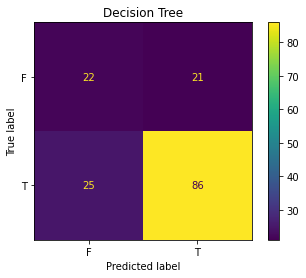

In [55]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['F','T'])
cm_display.plot()
plt.title("Decision Tree")
plt.show